In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

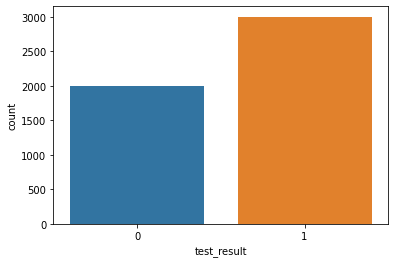

In [5]:
sns.countplot(x='test_result', data=df)

<AxesSubplot:xlabel='test_result', ylabel='age'>

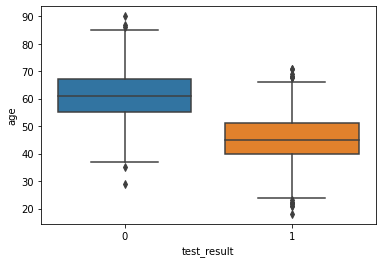

In [6]:
sns.boxplot(x='test_result', y='age', data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

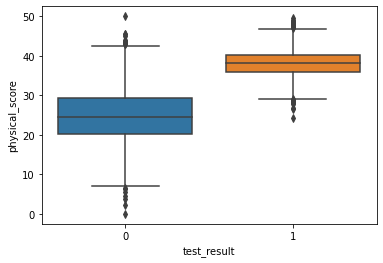

In [7]:
sns.boxplot(x='test_result', y='physical_score', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

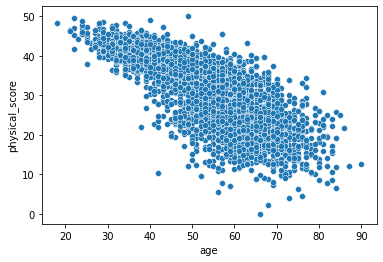

In [8]:
sns.scatterplot(x='age', y='physical_score', data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

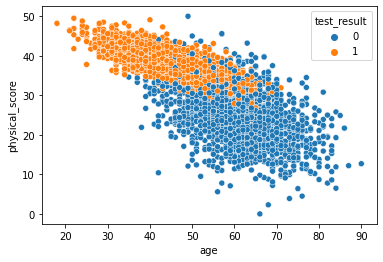

In [9]:
sns.scatterplot(x='age', y='physical_score', data=df, hue='test_result')

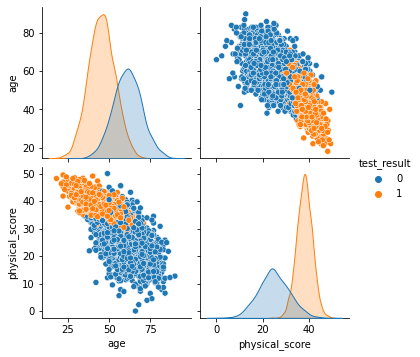

In [10]:
sns.pairplot(df, hue='test_result')

<AxesSubplot:>

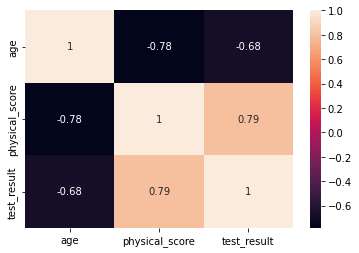

In [11]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

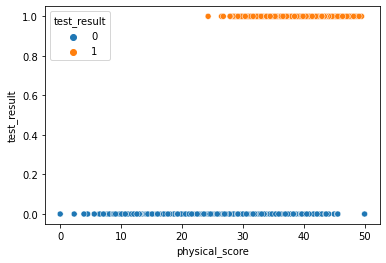

In [12]:
sns.scatterplot(x='physical_score', y='test_result', data=df, hue='test_result')

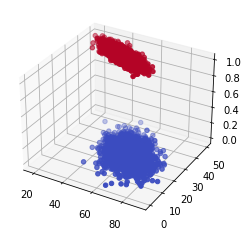

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'], cmap='coolwarm')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [15]:
X = df.drop(['test_result'], axis=1)
y = df['test_result']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [20]:
lr.fit(scaled_X_train, y_train)

LogisticRegression()

In [21]:
lr.coef_

array([[-0.94953524,  3.45991194]])

In [22]:
y_pred = lr.predict(scaled_X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
accuracy_score(y_test, y_pred)

0.93

In [25]:
print(confusion_matrix(y_test, y_pred))

[[172  21]
 [ 14 293]]


In [26]:
from sklearn.metrics import plot_confusion_matrix

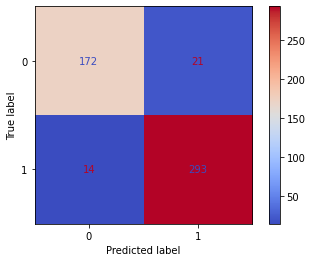

In [27]:
plot_confusion_matrix(lr, scaled_X_test, y_test, cmap='coolwarm')

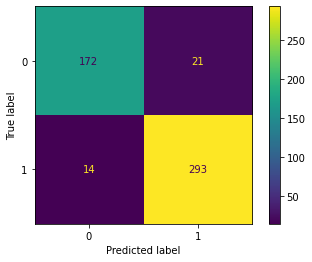

In [28]:
from sklearn.metrics._plot import confusion_matrix
confusion_matrix.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [30]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

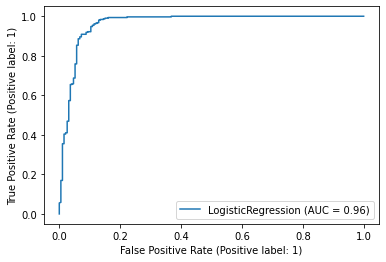

In [31]:
plot_roc_curve(lr, scaled_X_test, y_test)

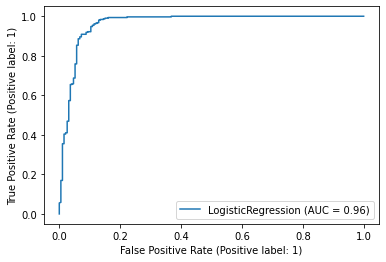

In [32]:
from sklearn.metrics._plot import roc_curve
roc_curve.RocCurveDisplay.from_estimator(lr, scaled_X_test, y_test)


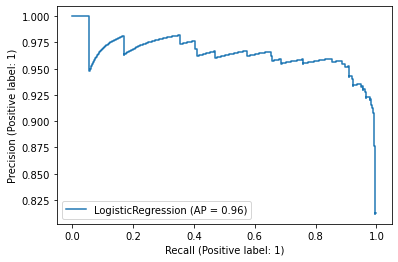

In [33]:
plot_precision_recall_curve(lr, scaled_X_test, y_test)

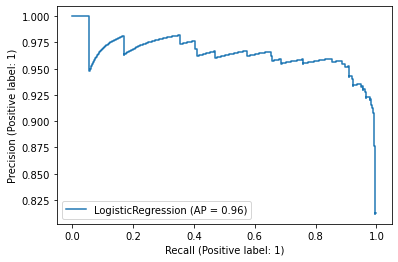

In [34]:
from sklearn.metrics._plot import precision_recall_curve
precision_recall_curve.PrecisionRecallDisplay.from_estimator(lr, scaled_X_test, y_test)

In [35]:
lr.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

In [36]:
df = pd.read_csv("./iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

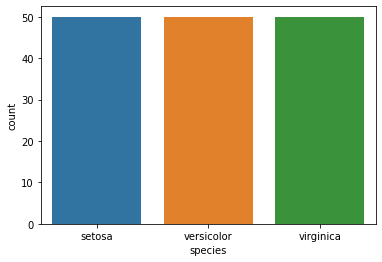

In [40]:
sns.countplot(x='species', data=df)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

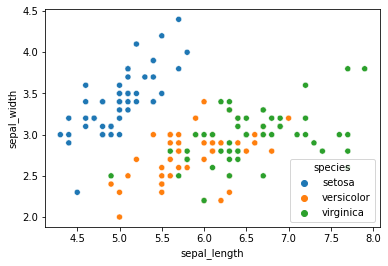

In [41]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')

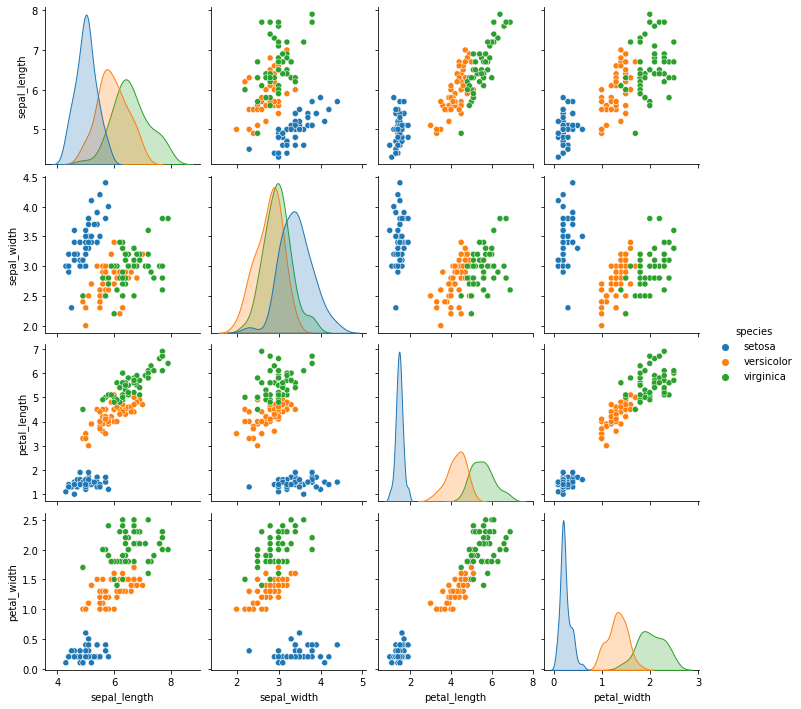

In [42]:
sns.pairplot(df, hue='species')

<AxesSubplot:>

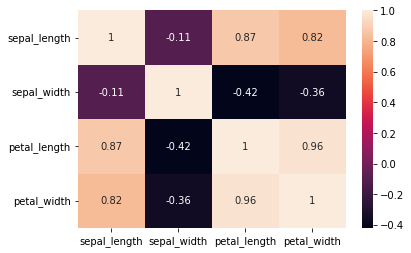

In [43]:
sns.heatmap(df.corr(), annot=True)

In [44]:
X = df.drop(['species'], axis=1)
y = df['species']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', multi_class='ovr')

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0,10,20)
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [51]:
grid = GridSearchCV(lr, param_grid)

In [52]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='ovr', solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [53]:
grid.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
accuracy_score(y_test, grid.predict(scaled_X_test))

0.9736842105263158

In [56]:
confusion_matrix(y_test, grid.predict(scaled_X_test))

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

In [58]:
print(classification_report(y_test, grid.predict(scaled_X_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [59]:
from sklearn.metrics import roc_curve, auc

In [60]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

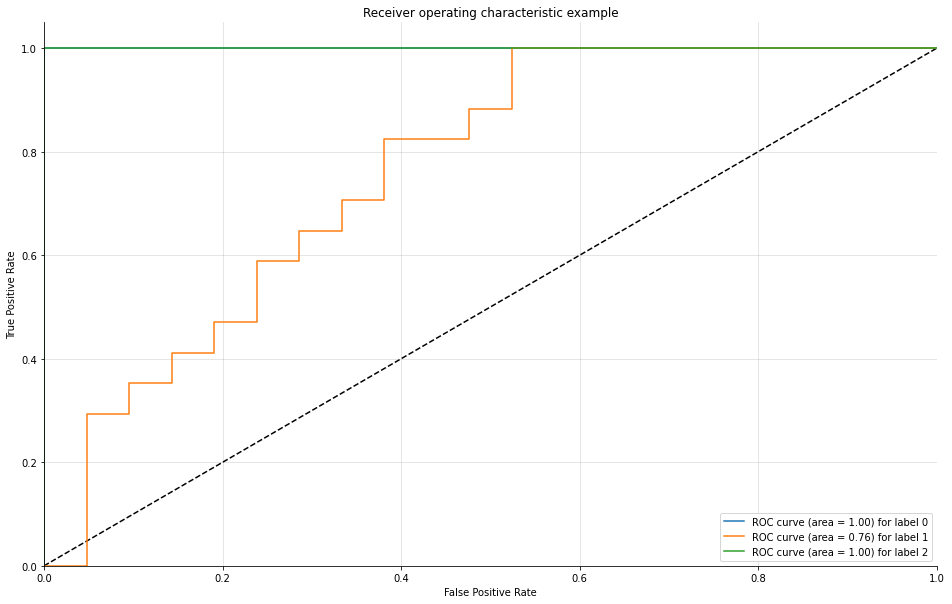

In [61]:
plot_multiclass_roc(grid, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))